# Non-linear Interpretability

The key to interpretable machine learning

1. explanation should be interpretable
2. number of explanations should be low (low entropy on possible explanations)

Assume $D = \{(x_i, y_i)\}_{i=1}^{|D|}$, then we have the following optimization function (denote $z$ as explanation)

$cost(D) = \mathbb{E}_{x,y,z} L(x, y, z) + \alpha \mathcal{H}(z)$

where $x$ is the input, $y$ is the output, $L$ is the data loss function, and $\mathcal{H}(z)$ is entropy and $\alpha>0$ is tradeoff parameter

Based on this design guideline, we propose the following generalized linear interpretable model:

![model_pipeline](presentations/unifiying_view_credibility.png )

The model has two components, the switch network (parametrized by $\theta_s$ and output explanation probability $p(z|x)$) and the weight network (parametrized by $\theta_w$ and output parameters of an interpretable model f). 

Assuming the switch network and the function network are differentiable, we can derive the update gradient for $\theta_s$ and $\theta_w$.

\begin{align}
    \frac{\partial{cost(D)}}{\partial \theta_s} &= \frac{\partial \mathbb{E}_{x,y,z} L(x, y, z) + \alpha \mathcal{H}(z)}{\partial \theta_s}\\
    &= \frac{\partial \sum_{x,y,z} p(x,y) p(z|x) L(x, y, z) + \alpha \mathcal{H}(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \sum_{z} L(x, y, z) \frac{ \partial p(z|x)}{\partial \theta_s} + \alpha  \frac{\partial \mathcal{H}(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} + \alpha \frac{\partial \mathcal{H}(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \frac{\partial \sum_{z} p(z) \log p(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) \frac{\partial p(z)}{\partial \theta_s} + p(z) \frac{\partial \log p(z)}{\partial \theta_s}) \\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) + 1) \frac{\partial p(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) + 1) \frac{\partial \sum_{x,y} p(x,y,z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) + 1) \frac{\partial \sum_{x,y} p(x,y)p(z|x)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) + 1) \sum_{x,y} p(x,y) \frac{\partial p(z|x)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{x,y} p(x,y) \sum_{z} (\log p(z) + 1) \frac{\partial p(z|x)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \mathbb{E}_{x,y} \mathbb{E}_{z|x} (\log p(z) + 1) \frac{\partial \log p(z|x)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y}\mathbb{E}_{z|x} (L(x, y, z) - \alpha \log p(z) - \alpha) \frac{\partial \log p(z|x)}{\partial \theta_s}
\end{align}

\begin{align}
    \frac{\partial{cost(D)}}{\partial \theta_w} &= \frac{\partial \mathbb{E}_{x,y,z} L(x, y, z) + \alpha \mathcal{H}(z)}{\partial \theta_w}\\
&= \frac{\partial \mathbb{E}_{x,y,z} L(x, y, z)}{\partial \theta_w}\\
&= \mathbb{E}_{x,y,z} \frac{\partial L(x, y, z)}{\partial \theta_w}
\end{align}

## design choices

For simplicty, we only consider a line as the output of the weight network. We could try other atomic structures such as  circle 

We consider 3 variant  of the switch network (assuming $z \in \mathbb{R}^K$)

1. the last layer of the switch network is a softmax ($z$ being a one hot vector)
2. the last layer of the switch network is multiple sigmoid functions ($p(z|x) = \Pi_{k=1}^K p(z_k|x)$)
3. the switch network is implemented by an rnn ($p(z|x) = \Pi_{k=1}^K p(z_k|x,z_{1:k-1})$)

Obviously, variant 3 is the most general because it computes the full probability while variant 2 assumes digits of z  are independently generated given the input. Variant 1 is also general but it can only hold $K$ explanations, whereas the other two can hold $2^K$ number of explanations so that they are more memory efficient.

We consider the following environment to run our experiment

- Triangle world (to test a world where only 3 line suffices)
- Egg world (to test a world where potentially infinite lines are needed)
- Island in the sea (to fail input gradient)
- Big and small islands (to fail counterfactual explanation)
- Randomly many islands (to get intuition on the model)


## interesting observations

The current model has the following properties

1. low number of explanations
2. $f_i$ are interpretable for $i\in\{0 \cdots K\}$ 

Though this looks good, it does not give the intended effect. Why is that?

Define $X_{f_i} := \{x \in \mathcal{X}: arg\max_i p(z_i|x)\}$ partitions input space $\mathcal{X}$

The problem is $y_{f_i}$ may only contain one class so that it is trivial for $\theta_w$ (have arbitrarily non interpretable model to classify) to correctly label data.

Another issue is the cluster (switch) assignment may not be local in the original input space. We cannot force $X_{f_i}$ to be continuous. The only hope for continuous input space is for the switch network to be simple.

We can solve problem 1 by adding $-\beta H(y|z)$ to the cost function. For problem 2, we need to think carefully (assign points to the nearest classifier does not work: try the triangle environment)


\begin{align}
    -\frac{\partial H(y|z)}{\partial \theta_s} &= \frac{\partial \mathbb{E}_z \sum_{y} p(y|z) \log p(y|z)}{\partial \theta_s}\\
    &= \frac{\partial \sum_{z} \sum_{x} p(z|x) p(x) \sum_{y} p(y|z) \log p(y|z)}{\partial \theta_s}\\
    &= \frac{\partial \mathbb{E}_{x} \sum_{z} p(z|x) \sum_{y} p(y|z) \log p(y|z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x} \sum_{z} \sum_{y} p(y|z) \log p(y|z) \frac{\partial  p(z|x) }{\partial \theta_s}\\
    &= \mathbb{E}_{x} \mathbb{E}_{z|x} \sum_{y} p(y|z) \log p(y|z) \frac{\partial  \log p(z|x) }{\partial \theta_s}
\end{align}

\begin{align}
    -\frac{\partial H(y|z)}{\partial \theta_w} = 0
\end{align}



In [33]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
import seaborn as sns
from lib.train import InterpretableTrainer
from torch.utils.data import Dataset, DataLoader, TensorDataset
from lib.model import Switch, Weight, apply_linear
from lib.utility import logit_elementwise_loss
from lib.utility import plotDecisionSurface, to_var, to_np, check_nan
from lib.utility import genCovX

## triangle world

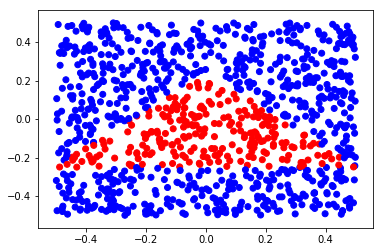

In [3]:
# instance: triangle_test_small_b1_s3
def build_triangle(n=10):  
    X = np.random.rand(n, 2)-0.5
#     X1 = np.random.rand(int(n/2), 2)-0.5
#     X2 = np.random.rand(int(n/2), 2)*0.2-0.1
#     X = np.vstack((X1, X2))
    
    # assume l1, l2, and l3 are the parameters of a line
    # e.g. [theta1, theta2, b]: theta1 x1 + theta2 x2 + b <= 0
    lines = [[1,1,-0.25], [-1, 1, -0.25], [0, -1, -0.25]]
    y = np.ones(n)
    for l in lines:
        t1, t2, b = l
        y = np.logical_and((X.dot([t1, t2]) + b) <= 0, y)
    return X, y.astype(int) * 2 - 1

def plotData(X, y):
    plt.scatter(X[:,0], X[:,1], c=list(map(lambda x: 'b' if x==-1 else 'r', y)))
    plt.show()

n = 1000
X, Y = build_triangle(n)
plotData(X, Y)

0.07% (0m 0s) 0.7196


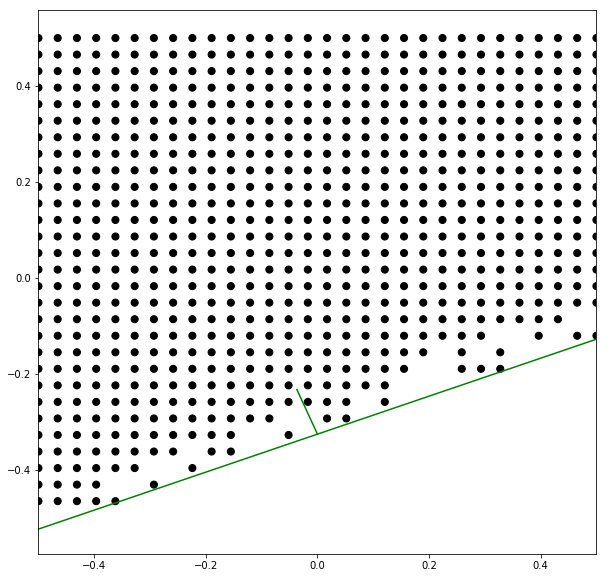

probability of choosing r is 0.0
probability of choosing g is 1.0
probability of choosing b is 0.0
p(y=-1|z="r") is 0.7735191583633423
p(y=-1|z="g") is 0.7410926222801208
p(y=-1|z="b") is 0.7431507110595703


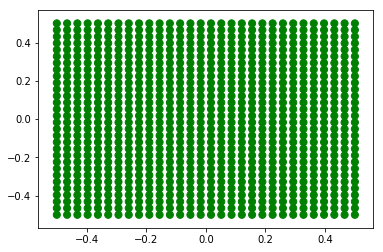

6.73% (0m 12s) 0.5503


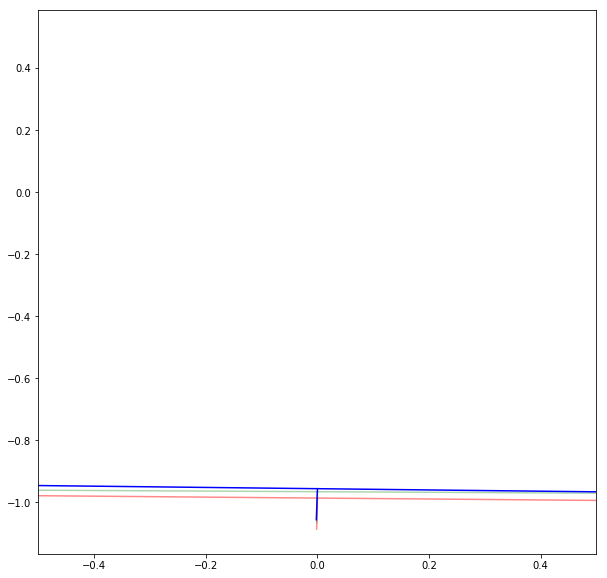

probability of choosing r is 0.259
probability of choosing g is 0.179
probability of choosing b is 0.562
p(y=-1|z="r") is 0.7477477192878723
p(y=-1|z="g") is 0.7645348906517029
p(y=-1|z="b") is 0.7399380803108215


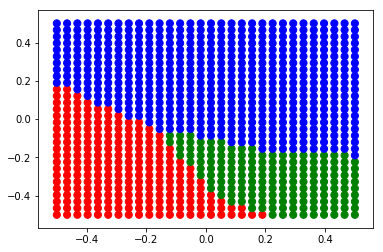

13.40% (0m 23s) 0.5492


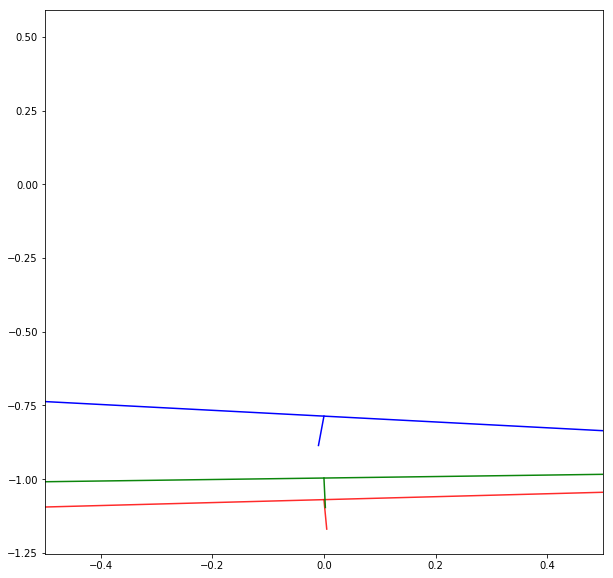

probability of choosing r is 0.299
probability of choosing g is 0.342
probability of choosing b is 0.359
p(y=-1|z="r") is 0.7544910311698914
p(y=-1|z="g") is 0.7250755429267883
p(y=-1|z="b") is 0.7731343507766724


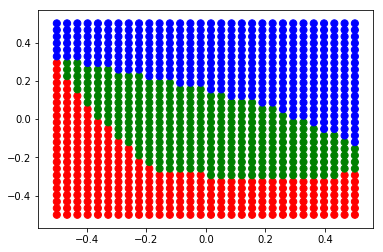

20.07% (0m 34s) 0.4735


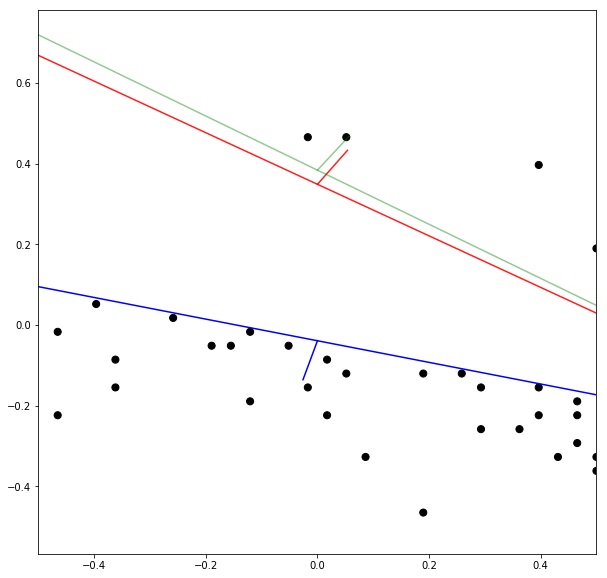

probability of choosing r is 0.38
probability of choosing g is 0.185
probability of choosing b is 0.435
p(y=-1|z="r") is 0.6878980994224548
p(y=-1|z="g") is 0.6590909361839294
p(y=-1|z="b") is 0.8783068656921387


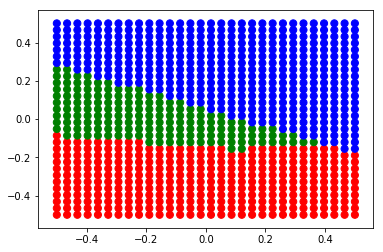

26.73% (0m 45s) 0.3550


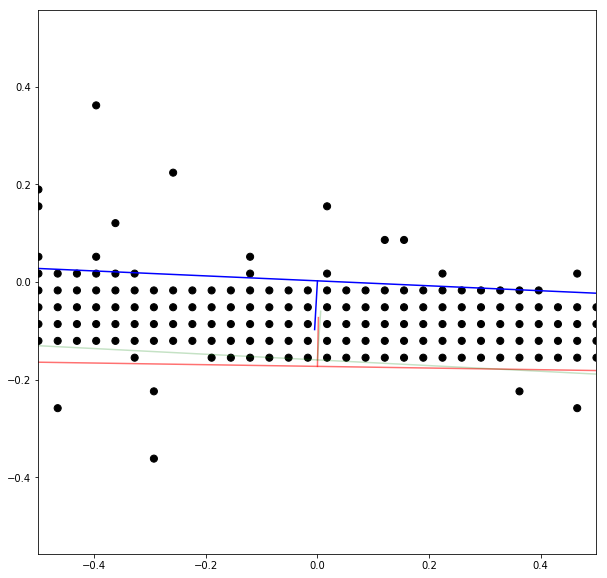

probability of choosing r is 0.312
probability of choosing g is 0.127
probability of choosing b is 0.561
p(y=-1|z="r") is 0.6707819104194641
p(y=-1|z="g") is 0.6652892827987671
p(y=-1|z="b") is 0.829126238822937


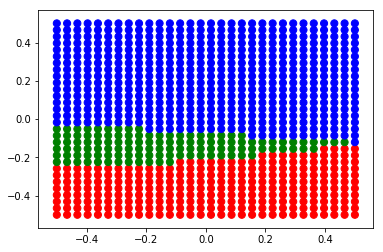

33.40% (0m 54s) 0.3213


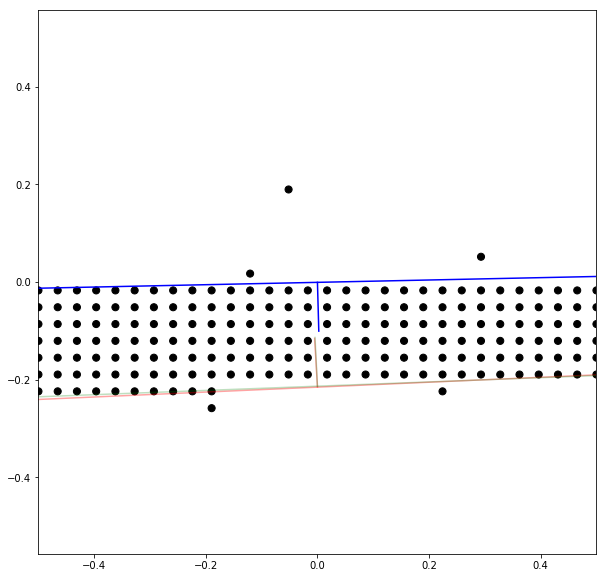

probability of choosing r is 0.224
probability of choosing g is 0.156
probability of choosing b is 0.62
p(y=-1|z="r") is 0.7758620977401733
p(y=-1|z="g") is 0.6759259104728699
p(y=-1|z="b") is 0.7704917788505554


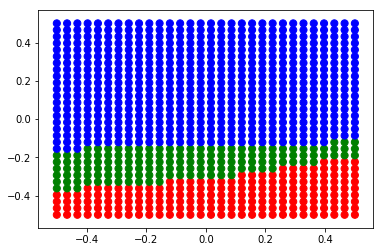

40.07% (1m 4s) 0.3049


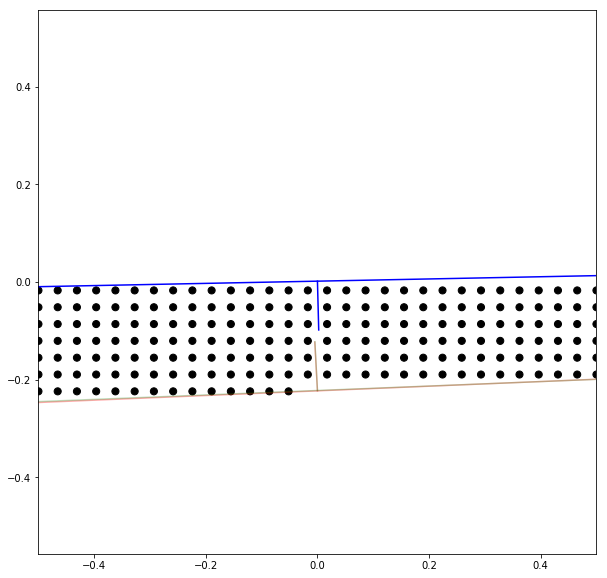

probability of choosing r is 0.207
probability of choosing g is 0.16
probability of choosing b is 0.633
p(y=-1|z="r") is 0.7582417726516724
p(y=-1|z="g") is 0.7272727489471436
p(y=-1|z="b") is 0.7564516067504883


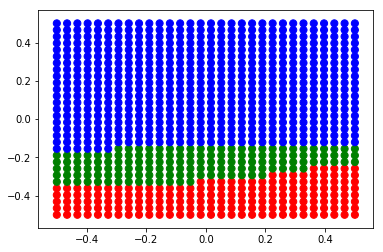

46.73% (1m 14s) 0.3100


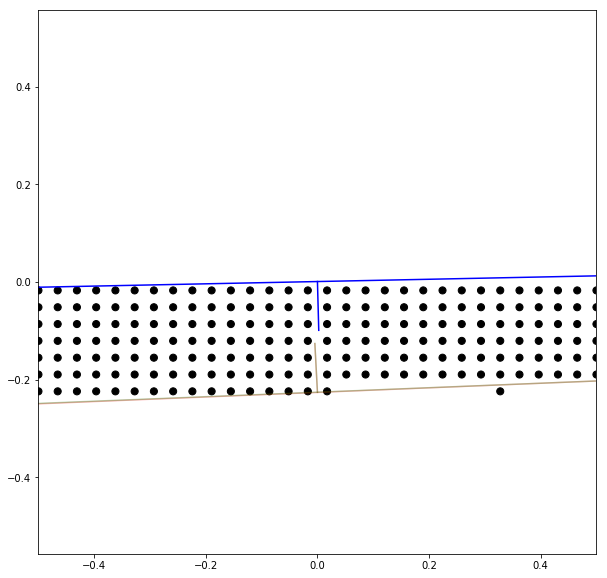

probability of choosing r is 0.187
probability of choosing g is 0.177
probability of choosing b is 0.636
p(y=-1|z="r") is 0.7745664715766907
p(y=-1|z="g") is 0.711442768573761
p(y=-1|z="b") is 0.7571884989738464


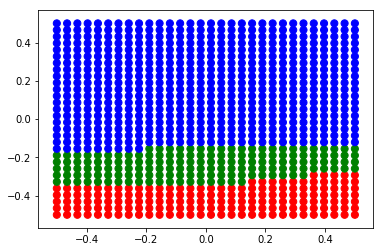

53.40% (1m 24s) 0.3025


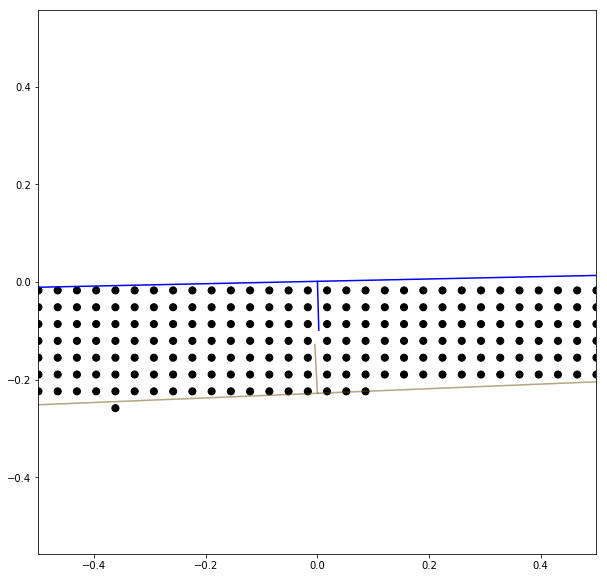

probability of choosing r is 0.17
probability of choosing g is 0.192
probability of choosing b is 0.638
p(y=-1|z="r") is 0.8079096078872681
p(y=-1|z="g") is 0.6979166865348816
p(y=-1|z="b") is 0.7511885762214661


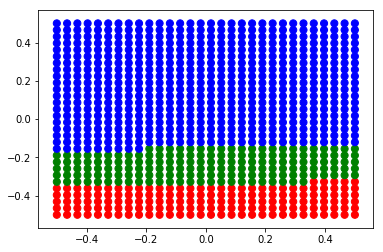

60.07% (1m 33s) 0.2972


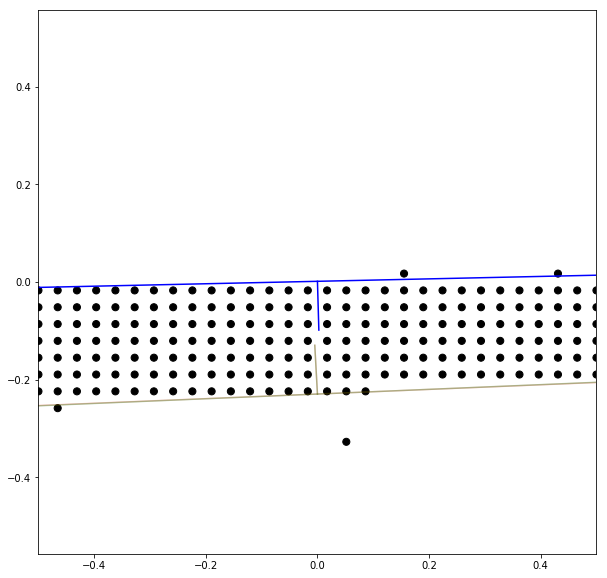

probability of choosing r is 0.162
probability of choosing g is 0.201
probability of choosing b is 0.637
p(y=-1|z="r") is 0.6930692791938782
p(y=-1|z="g") is 0.7513513565063477
p(y=-1|z="b") is 0.76998370885849


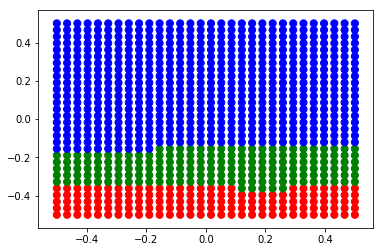

66.73% (1m 44s) 0.3052


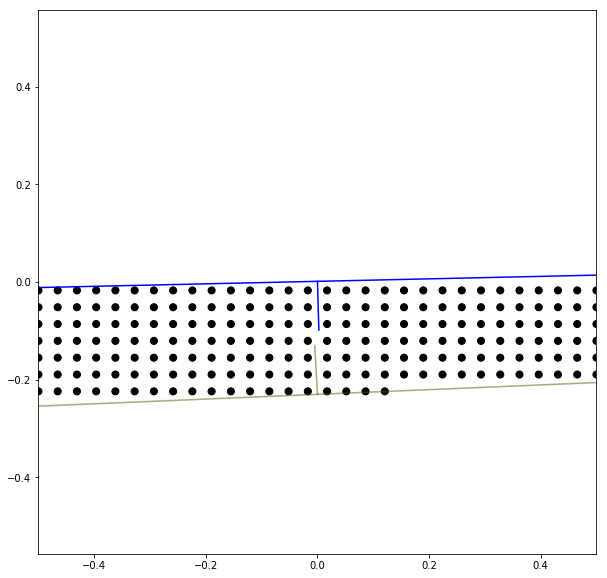

probability of choosing r is 0.127
probability of choosing g is 0.237
probability of choosing b is 0.636
p(y=-1|z="r") is 0.7052023410797119
p(y=-1|z="g") is 0.7799999713897705
p(y=-1|z="b") is 0.7543859481811523


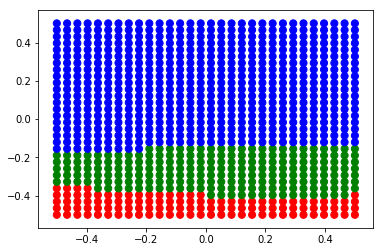

73.40% (1m 53s) 0.2923


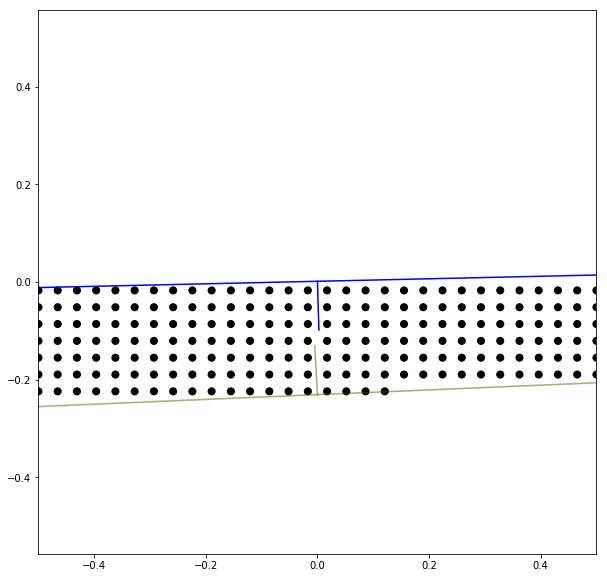

probability of choosing r is 0.131
probability of choosing g is 0.234
probability of choosing b is 0.635
p(y=-1|z="r") is 0.7204301357269287
p(y=-1|z="g") is 0.7552083134651184
p(y=-1|z="b") is 0.7588424682617188


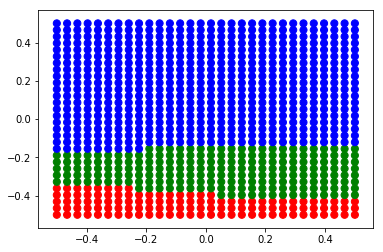

80.07% (2m 3s) 0.2916


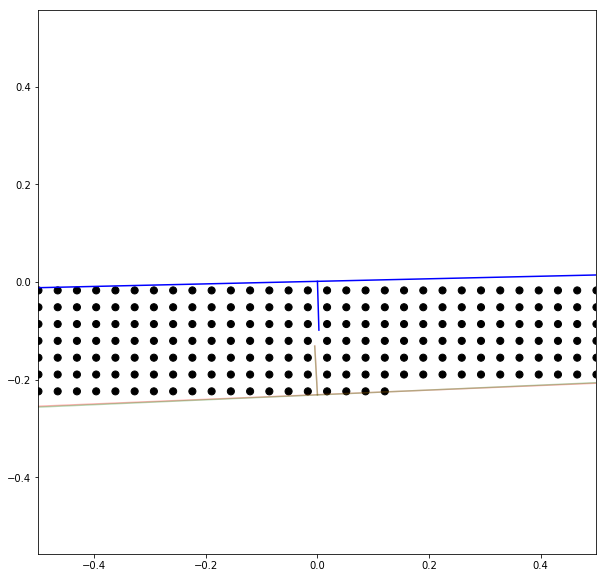

probability of choosing r is 0.186
probability of choosing g is 0.179
probability of choosing b is 0.635
p(y=-1|z="r") is 0.7149758338928223
p(y=-1|z="g") is 0.7616279125213623
p(y=-1|z="b") is 0.760064423084259


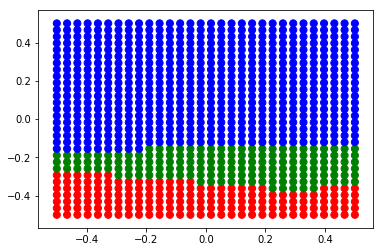

86.73% (2m 12s) 0.3028


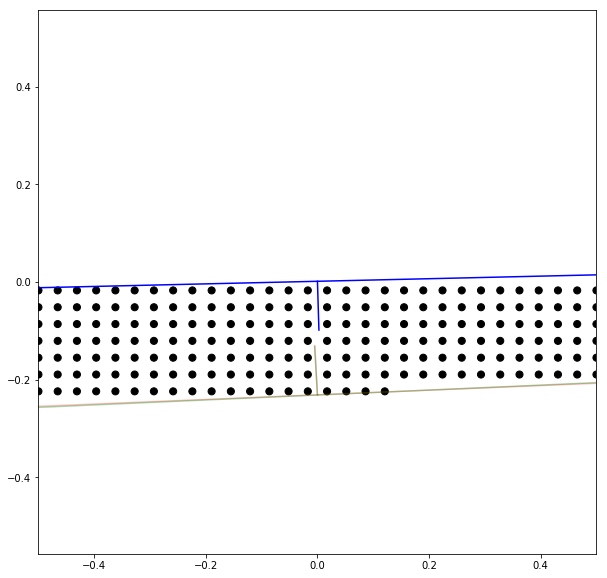

probability of choosing r is 0.162
probability of choosing g is 0.207
probability of choosing b is 0.631
p(y=-1|z="r") is 0.7272727489471436
p(y=-1|z="g") is 0.7661691308021545
p(y=-1|z="b") is 0.7528089880943298


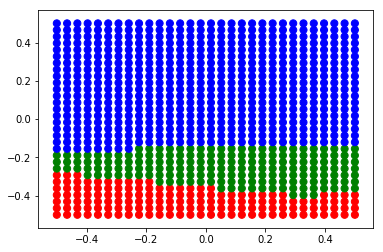

93.40% (2m 22s) 0.2901


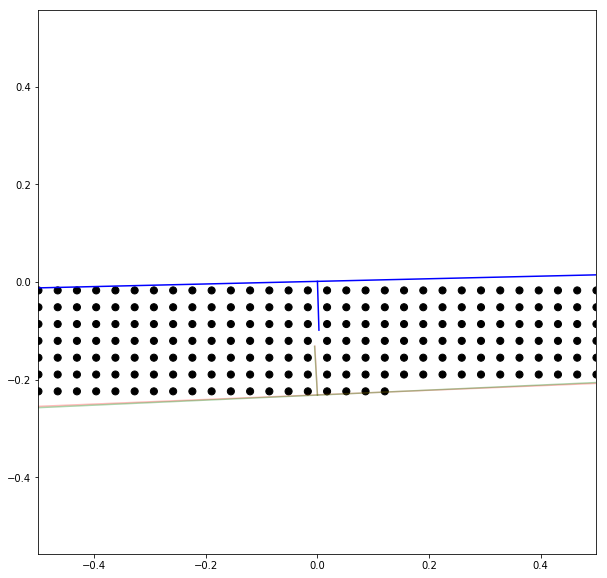

probability of choosing r is 0.168
probability of choosing g is 0.205
probability of choosing b is 0.627
p(y=-1|z="r") is 0.7564767003059387
p(y=-1|z="g") is 0.6891191601753235
p(y=-1|z="b") is 0.7687296271324158


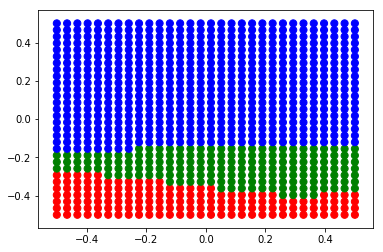

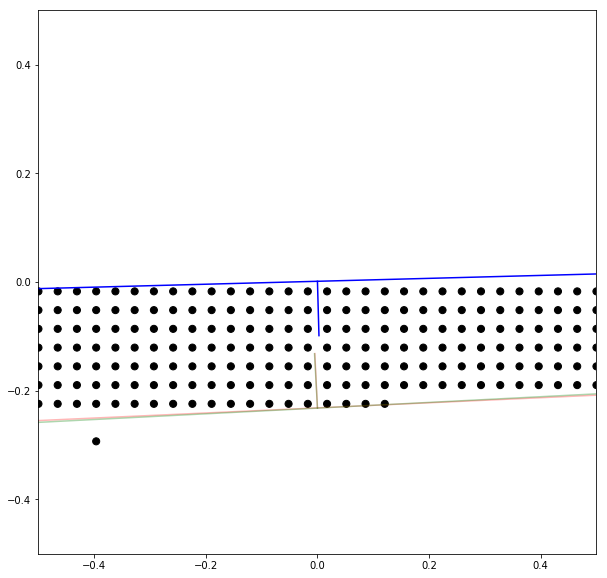

probability of choosing r is 0.176
probability of choosing g is 0.198
probability of choosing b is 0.626
p(y=-1|z="r") is 0.75789475440979
p(y=-1|z="g") is 0.6894736886024475
p(y=-1|z="b") is 0.7677419185638428


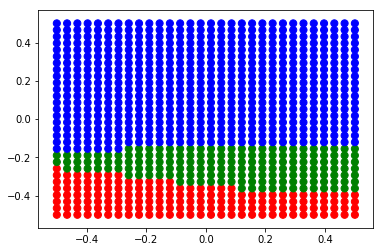

[0.7196364998817444,
 0.5503368973731995,
 0.5492060780525208,
 0.47350507974624634,
 0.3550272285938263,
 0.3212536573410034,
 0.3049164116382599,
 0.30995848774909973,
 0.3025153875350952,
 0.29718267917633057,
 0.30520227551460266,
 0.29230380058288574,
 0.2915613353252411,
 0.3027956783771515,
 0.2900943160057068]

In [6]:
input_size = 2 # 2d input
switch_size = 3 # can only output 3 lines

x = to_var(torch.from_numpy(X)).float()
y = to_var(torch.from_numpy(Y)).float()

switch = Switch(input_size, switch_size)
weight = Weight(switch_size, input_size+1) # +1 for b in linear model

max_grad = 40
alpha = -0.2 # -0.5
beta = -alpha # 0.7
log_name = 'triangle_test' + '_a' + str(alpha) + '_b' + str(beta) + '_s' + str(switch_size)
silence = False
t =  InterpretableTrainer(switch, weight, apply_linear, alpha=alpha, beta=beta,
                          log_name=log_name, max_grad=max_grad, silence=silence)

# fit a model here:
train_data = TensorDataset(x.data, y.data)
data = DataLoader(train_data, batch_size=n, shuffle=True)

t.fit(data, n_epochs=1500, print_every=100)

In [7]:
input_size = 2 # 2d input
switch_size = 3 # can only output 3 lines

x = to_var(torch.from_numpy(X)).float()
y = to_var(torch.from_numpy(Y)).float()

max_grad = 0.1
for beta in [0.5, 0.1, 0, 1]:
    alpha = -beta
    switch = Switch(input_size, switch_size)
    weight = Weight(switch_size, input_size+1) # +1 for b in linear model

    log_name = 'triangle_test_small' + '_b' + str(beta) + '_s' + str(switch_size)
    silence = True
    t =  InterpretableTrainer(switch, weight, apply_linear, alpha=alpha, beta=beta,
                              log_name=log_name, max_grad=max_grad, silence=silence)

    # fit a model here:
    train_data = TensorDataset(x.data, y.data)
    data = DataLoader(train_data, batch_size=n, shuffle=True)

    t.fit(data, n_epochs=1500, print_every=100)

0.07% (0m 0s) 0.7388
6.73% (0m 10s) 0.5502
13.40% (0m 19s) 0.5466
20.07% (0m 29s) 0.4999
26.73% (0m 38s) 0.4126
33.40% (0m 48s) 0.3590
40.07% (0m 58s) 0.3304
46.73% (1m 7s) 0.2499
53.40% (1m 17s) 0.1240
60.07% (1m 28s) 0.0808
66.73% (1m 37s) 0.0549
73.40% (1m 47s) 0.0891
80.07% (1m 57s) 0.0538
86.73% (2m 6s) 0.0767
93.40% (2m 16s) 0.0245
0.07% (0m 0s) 0.6773
6.73% (0m 10s) 0.5495
13.40% (0m 19s) 0.5023
20.07% (0m 29s) 0.3725
26.73% (0m 38s) 0.3420
33.40% (0m 48s) 0.3111
40.07% (0m 58s) 0.3007
46.73% (1m 7s) 0.3116
53.40% (1m 17s) 0.3031
60.07% (1m 27s) 0.2989
66.73% (1m 36s) 0.2957
73.40% (1m 48s) 0.2880
80.07% (1m 57s) 0.2898
86.73% (2m 7s) 0.2880
93.40% (2m 17s) 0.2999
0.07% (0m 0s) 0.6712
6.73% (0m 9s) 0.5498
13.40% (0m 19s) 0.5190
20.07% (0m 29s) 0.3732
26.73% (0m 38s) 0.3221
33.40% (0m 48s) 0.2923
40.07% (0m 57s) 0.2843
46.73% (1m 9s) 0.2721
53.40% (1m 19s) 0.2569
60.07% (1m 28s) 0.2399
66.73% (1m 38s) 0.2321
73.40% (1m 47s) 0.2255
80.07% (1m 58s) 0.2078
86.73% (2m 8s) 0.1672
93.4

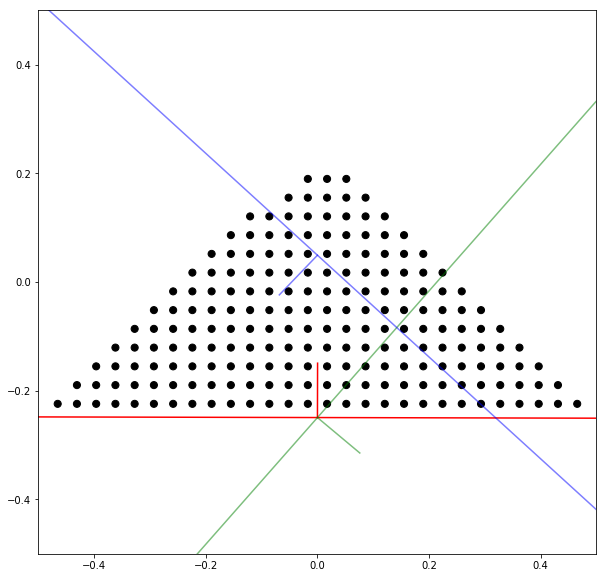

probability of choosing r is 0.497
probability of choosing g is 0.251
probability of choosing b is 0.252
p(y=-1|z="r") is 0.5201612710952759
p(y=-1|z="g") is 1.0
p(y=-1|z="b") is 0.9880478382110596


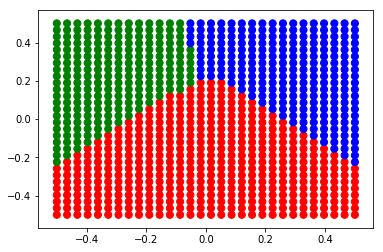

In [18]:
t.plot(to_var(x.data), to_var(y.data), inrange=True)

## rectangle world

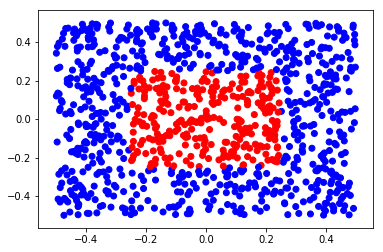

In [12]:
# instance: square_b0.5_s4
def build_square(n=10):  
    X = np.random.rand(n, 2)-0.5
#     X1 = np.random.rand(int(n/2), 2)-0.5
#     X2 = np.random.rand(int(n/2), 2)*0.2-0.1
#     X = np.vstack((X1, X2))
    
    # assume l1, l2, and l3 are the parameters of a line
    # e.g. [theta1, theta2, b]: theta1 x1 + theta2 x2 + b <= 0
    lines = [[-1,0,-0.25], [1, 0, -0.25], [0, -1, -0.25], [0, 1, -0.25]]
    y = np.ones(n)
    for l in lines:
        t1, t2, b = l
        y = np.logical_and((X.dot([t1, t2]) + b) <= 0, y)
    return X, y.astype(int) * 2 - 1

def plotData(X, y):
    plt.scatter(X[:,0], X[:,1], c=list(map(lambda x: 'b' if x==-1 else 'r', y)))
    plt.show()

n = 1000
X, Y = build_square(n)
plotData(X, Y)

0.10% (0m 0s) 0.7271


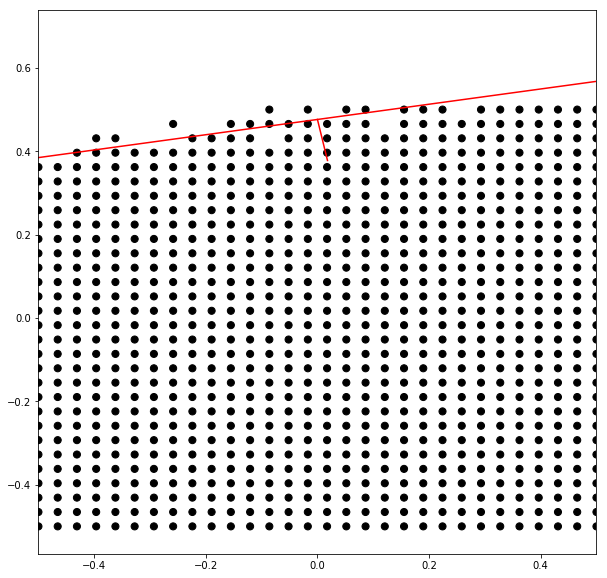

probability of choosing r is 1.0
probability of choosing g is 0.0
probability of choosing b is 0.0
probability of choosing orange is 0.0
p(y=-1|z="r") is 0.6778523325920105
p(y=-1|z="g") is 0.7258687019348145
p(y=-1|z="b") is 0.71875
p(y=-1|z="orange") is 0.7410358786582947


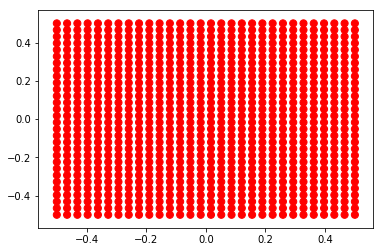

10.10% (0m 13s) 0.5974


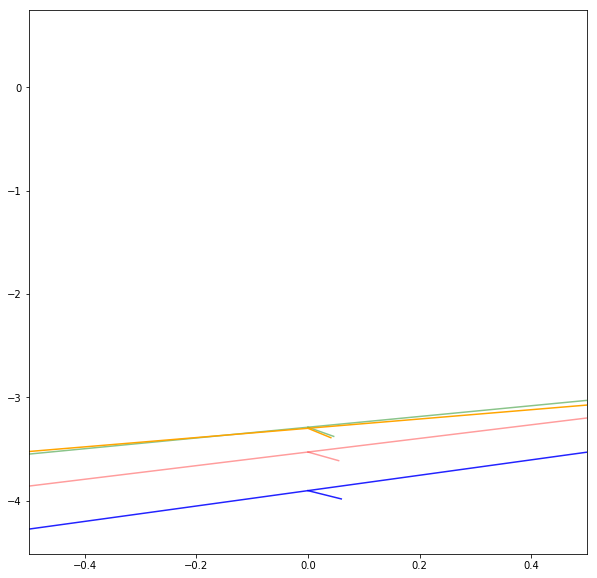

probability of choosing r is 0.142
probability of choosing g is 0.17
probability of choosing b is 0.319
probability of choosing orange is 0.369
p(y=-1|z="r") is 0.6581196784973145
p(y=-1|z="g") is 0.715753436088562
p(y=-1|z="b") is 0.729613721370697
p(y=-1|z="orange") is 0.7510373592376709


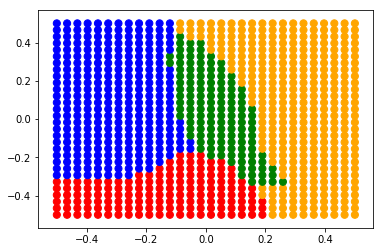

20.10% (0m 26s) 0.5974


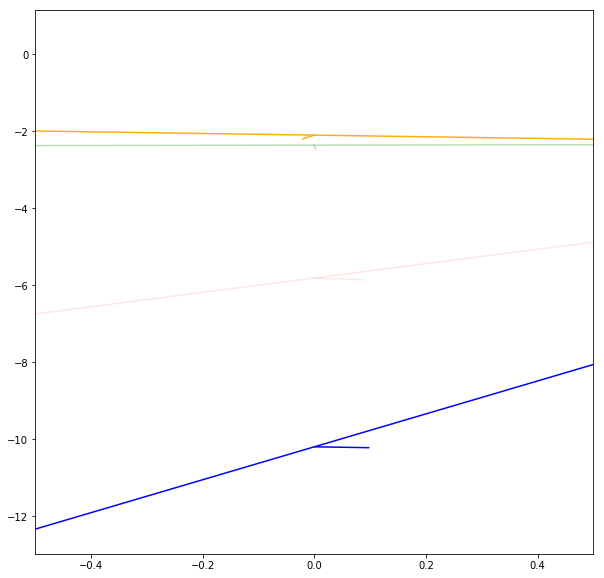

probability of choosing r is 0.045
probability of choosing g is 0.12
probability of choosing b is 0.437
probability of choosing orange is 0.398
p(y=-1|z="r") is 0.7349397540092468
p(y=-1|z="g") is 0.7254902124404907
p(y=-1|z="b") is 0.6900826692581177
p(y=-1|z="orange") is 0.7047244310379028


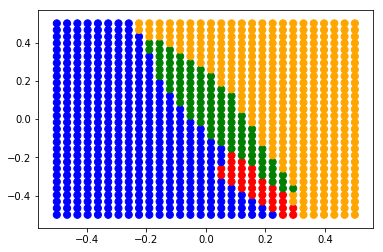

30.10% (0m 39s) 0.5579


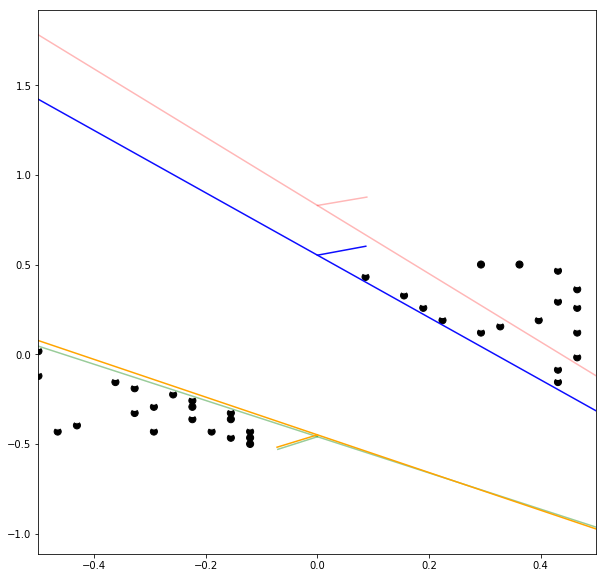

probability of choosing r is 0.107
probability of choosing g is 0.152
probability of choosing b is 0.361
probability of choosing orange is 0.38
p(y=-1|z="r") is 0.73893803358078
p(y=-1|z="g") is 0.7061068415641785
p(y=-1|z="b") is 0.69921875
p(y=-1|z="orange") is 0.71484375


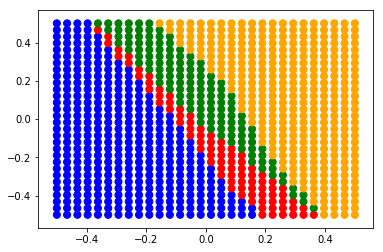

40.10% (0m 50s) 0.5077


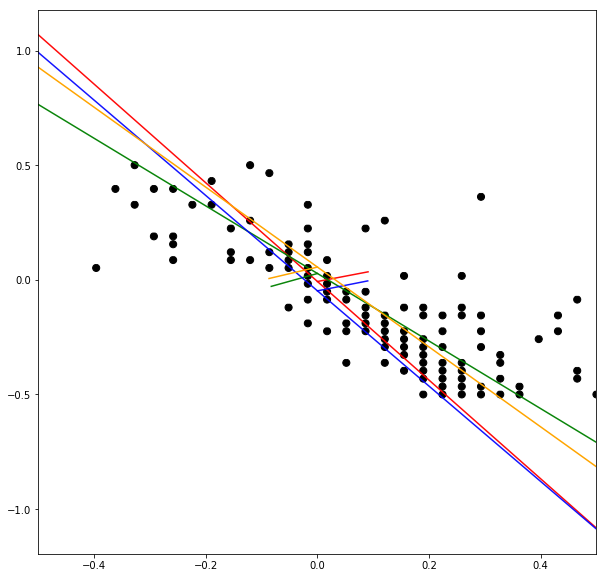

probability of choosing r is 0.25
probability of choosing g is 0.25
probability of choosing b is 0.239
probability of choosing orange is 0.261
p(y=-1|z="r") is 0.7130434513092041
p(y=-1|z="g") is 0.6996047496795654
p(y=-1|z="b") is 0.7242798209190369
p(y=-1|z="orange") is 0.7189781069755554


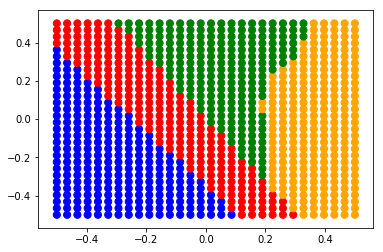

50.10% (1m 1s) 0.4814


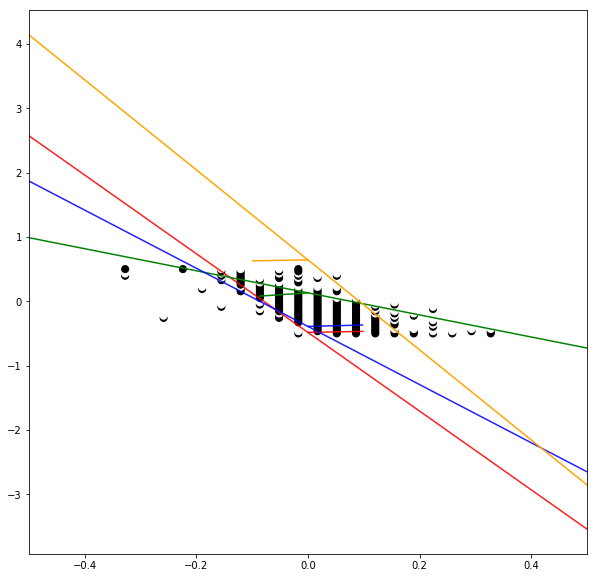

probability of choosing r is 0.235
probability of choosing g is 0.263
probability of choosing b is 0.234
probability of choosing orange is 0.268
p(y=-1|z="r") is 0.6996047496795654
p(y=-1|z="g") is 0.6964980363845825
p(y=-1|z="b") is 0.7432432174682617
p(y=-1|z="orange") is 0.7201492786407471


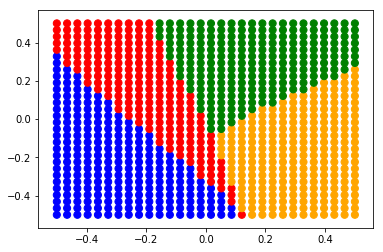

60.10% (1m 14s) 0.3757


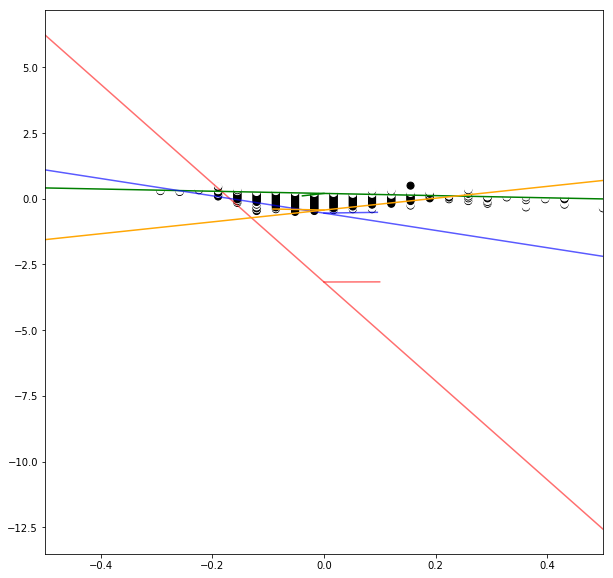

probability of choosing r is 0.177
probability of choosing g is 0.313
probability of choosing b is 0.203
probability of choosing orange is 0.307
p(y=-1|z="r") is 0.7135922312736511
p(y=-1|z="g") is 0.6824324131011963
p(y=-1|z="b") is 0.7564767003059387
p(y=-1|z="orange") is 0.7180327773094177


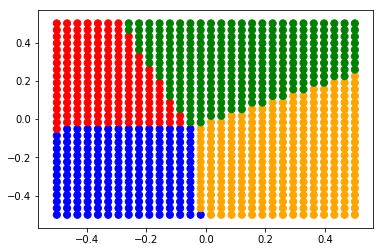

70.10% (1m 26s) 0.2435


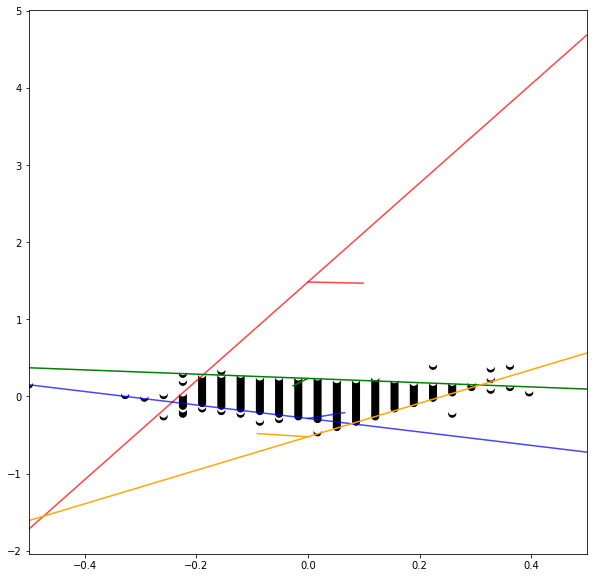

probability of choosing r is 0.213
probability of choosing g is 0.291
probability of choosing b is 0.212
probability of choosing orange is 0.284
p(y=-1|z="r") is 0.7592592835426331
p(y=-1|z="g") is 0.715753436088562
p(y=-1|z="b") is 0.6872037649154663
p(y=-1|z="orange") is 0.6975088715553284


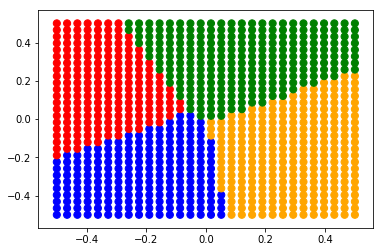

80.10% (1m 38s) 0.1589


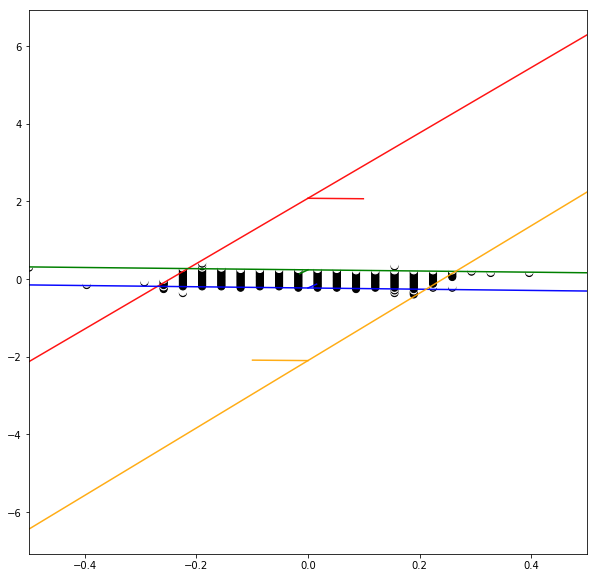

probability of choosing r is 0.242
probability of choosing g is 0.263
probability of choosing b is 0.255
probability of choosing orange is 0.24
p(y=-1|z="r") is 0.7570850253105164
p(y=-1|z="g") is 0.7191011309623718
p(y=-1|z="b") is 0.615686297416687
p(y=-1|z="orange") is 0.7705627679824829


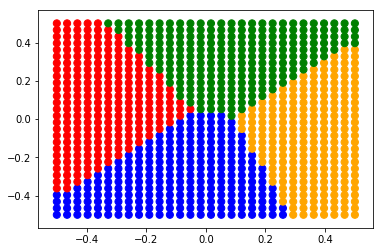

90.10% (1m 50s) 0.0887


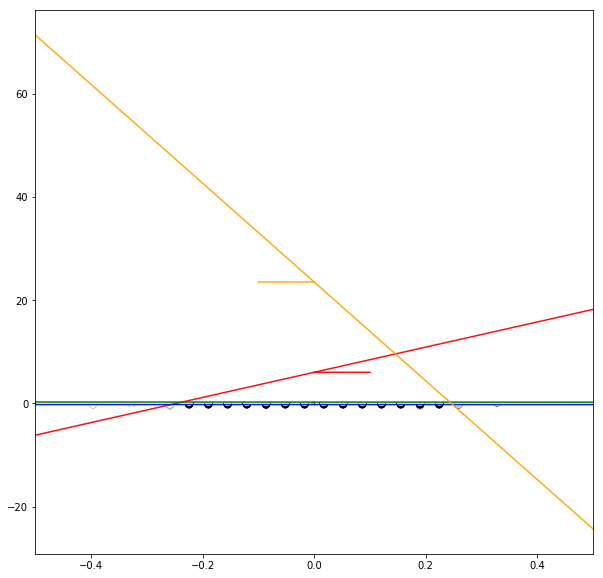

probability of choosing r is 0.248
probability of choosing g is 0.263
probability of choosing b is 0.248
probability of choosing orange is 0.241
p(y=-1|z="r") is 0.7804877758026123
p(y=-1|z="g") is 0.7230769395828247
p(y=-1|z="b") is 0.59765625
p(y=-1|z="orange") is 0.7605041861534119


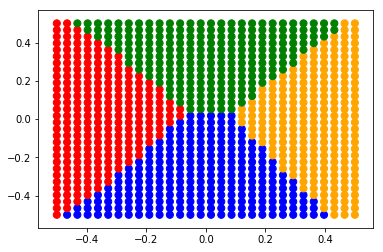

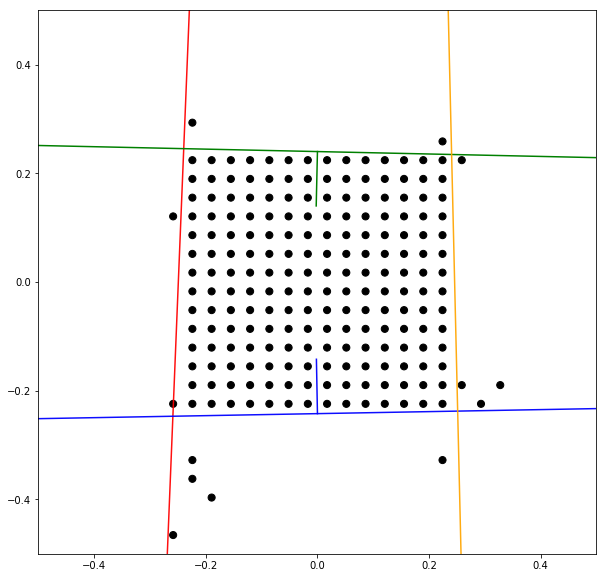

probability of choosing r is 0.246
probability of choosing g is 0.262
probability of choosing b is 0.248
probability of choosing orange is 0.244
p(y=-1|z="r") is 0.7850877046585083
p(y=-1|z="g") is 0.7106227278709412
p(y=-1|z="b") is 0.6169354915618896
p(y=-1|z="orange") is 0.7490040063858032


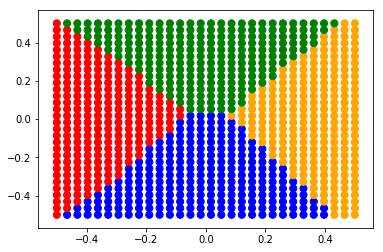

[0.7271243929862976,
 0.5974090695381165,
 0.5974496006965637,
 0.5579048991203308,
 0.507742702960968,
 0.48138347268104553,
 0.3757316470146179,
 0.24348770081996918,
 0.15889987349510193,
 0.08868446946144104]

In [13]:
input_size = 2 # 2d input
switch_size = 4 # can only output 4 lines

x = to_var(torch.from_numpy(X)).float()
y = to_var(torch.from_numpy(Y)).float()

switch = Switch(input_size, switch_size)
weight = Weight(switch_size, input_size+1) # +1 for b in linear model

max_grad = 0.1
alpha = -0.5 # -0.5
beta = 0.5 # 0.7
log_name = 'square' + '_b' + str(beta) + '_s' + str(switch_size)
silence = False
t =  InterpretableTrainer(switch, weight, apply_linear, alpha=alpha, beta=beta,
                          log_name=log_name, max_grad=max_grad, silence=silence)

# fit a model here:
train_data = TensorDataset(x.data, y.data)
data = DataLoader(train_data, batch_size=n, shuffle=True)

t.fit(data, n_epochs=1000, print_every=100)

## 2 rectangle world

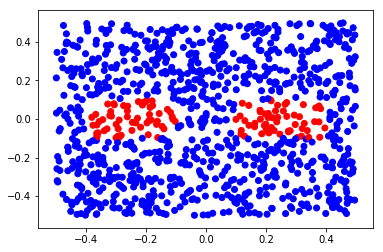

In [14]:
def build_square2(n=10):  
    X = np.random.rand(n, 2)-0.5
#     X1 = np.random.rand(int(n/2), 2)-0.5
#     X2 = np.random.rand(int(n/2), 2)*0.2-0.1
#     X = np.vstack((X1, X2))
    
    # assume l1, l2, and l3 are the parameters of a line
    # e.g. [theta1, theta2, b]: theta1 x1 + theta2 x2 + b <= 0
    lines = [[-1,0,-0.4], [1, 0, 0.1], [0, -1, -0.1], [0, 1, -0.1]]
    y = np.ones(n)
    for l in lines:
        t1, t2, b = l
        y = np.logical_and((X.dot([t1, t2]) + b) <= 0, y)
     
    lines = [[-1,0,0.1], [1, 0, -0.4], [0, -1, -0.1], [0, 1, -0.1]]
    y2 = np.ones(n)
    for l in lines:
        t1, t2, b = l
        y2 = np.logical_and((X.dot([t1, t2]) + b) <= 0, y2)
    
    y = np.logical_or(y, y2)
    
    return X, y.astype(int) * 2 - 1

def plotData(X, y):
    plt.scatter(X[:,0], X[:,1], c=list(map(lambda x: 'b' if x==-1 else 'r', y)))
    plt.show()

n = 1000
X, Y = build_square2(n)
plotData(X, Y)

In [17]:
input_size = 2 # 2d input
switch_size = 8 # can only output 8 lines

x = to_var(torch.from_numpy(X)).float()
y = to_var(torch.from_numpy(Y)).float()

max_grad = 40
for beta in [0.5]:#[0.01,0.1,0.5,1]:
    alpha = -beta
    
    switch = Switch(input_size, switch_size)
    weight = Weight(switch_size, input_size+1) # +1 for b in linear model
    
    log_name = 'square2_smallSwitch_Weight3hidden_long' + '_b' + str(beta) + '_s' + str(switch_size)
    silence = True
    t =  InterpretableTrainer(switch, weight, apply_linear, alpha=alpha, beta=beta,
                              log_name=log_name, max_grad=max_grad, silence=silence)

    # fit a model here:
    train_data = TensorDataset(x.data, y.data)
    data = DataLoader(train_data, batch_size=n, shuffle=True)

    t.fit(data, n_epochs=10000, print_every=100)

0.01% (0m 0s) 0.7242
1.01% (0m 17s) 0.3568
2.01% (0m 34s) 0.3568
3.01% (0m 51s) 0.3570
4.01% (1m 8s) 0.3567
5.01% (1m 25s) 0.3569
6.01% (1m 42s) 0.3570
7.01% (2m 0s) 0.3564
8.01% (2m 18s) 0.3562
9.01% (2m 35s) 0.3535
10.01% (2m 53s) 0.2880
11.01% (3m 10s) 0.2170
12.01% (3m 27s) 0.1869
13.01% (3m 44s) 0.1718
14.01% (4m 1s) 0.1774
15.01% (4m 19s) 0.1695
16.01% (4m 36s) 0.1688
17.01% (4m 53s) 0.1794
18.01% (5m 10s) 0.1647
19.01% (5m 27s) 0.1659
20.01% (5m 44s) 0.1653
21.01% (6m 1s) 0.1615
22.01% (6m 18s) 0.1630
23.01% (6m 35s) 0.1580
24.01% (6m 52s) 0.1692
25.01% (7m 9s) 0.1610
26.01% (7m 22s) 0.1630
27.01% (7m 34s) 0.1577
28.01% (7m 52s) 0.1570
29.01% (8m 9s) 0.1600
30.01% (8m 26s) 0.1604
31.01% (8m 44s) 0.1525
32.01% (9m 0s) 0.1584
33.01% (9m 18s) 0.1561
34.01% (9m 36s) 0.1572
35.01% (9m 53s) 0.1594
36.01% (10m 10s) 0.1591
37.01% (10m 27s) 0.1570
38.01% (10m 44s) 0.1499
39.01% (11m 1s) 0.1526
40.01% (11m 19s) 0.1515
41.01% (11m 36s) 0.1596
42.01% (11m 54s) 0.1559
43.01% (12m 11s) 0.1598

## egg world

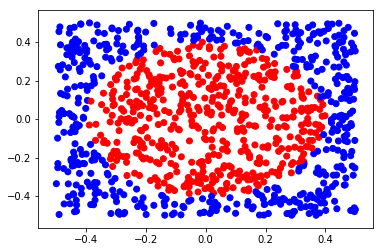

In [14]:
def build_circle(n=10):  
    X = np.random.rand(n, 2)-0.5
    y = (X[:,0]**2 + X[:, 1]**2 <= 0.16)
    return X, y.astype(int) * 2 - 1

def plotData(X, y):
    plt.scatter(X[:,0], X[:,1], c=list(map(lambda x: 'b' if x==-1 else 'r', y)))
    plt.show()

n = 1000
X, Y = build_circle(n)
plotData(X, Y)

In [10]:
input_size = 2 # 2d input
switch_size = 10 # can only output switch_size lines

x = to_var(torch.from_numpy(X)).float()
y = to_var(torch.from_numpy(Y)).float()

switch = Switch(input_size, switch_size)
weight = Weight(switch_size, input_size+1) # +1 for b in linear model

t =  InterpretableTrainer(switch, weight, apply_linear, alpha=-0.5, beta=0.5,
                         log_name='circle_b0.5', silence=True)

# fit a model here:
train_data = TensorDataset(x.data, y.data)
data = DataLoader(train_data, batch_size=1000, shuffle=True)
t.fit(data, n_epochs=1500, print_every=100)

0.07% (0m 0s) 0.6969
6.73% (0m 19s) 0.6908
13.40% (0m 37s) 0.6343
20.07% (0m 56s) 0.4188
26.73% (1m 14s) 0.3269
33.40% (1m 33s) 0.2506
40.07% (1m 52s) 0.2035
46.73% (2m 10s) 0.1654
53.40% (2m 28s) 0.1543
60.07% (2m 47s) 0.1349
66.73% (3m 5s) 0.1229
73.40% (3m 24s) 0.1021
80.07% (3m 43s) 0.0893
86.73% (4m 1s) 0.1122
93.40% (4m 19s) 0.0841


[0.6969120502471924,
 0.6907628178596497,
 0.6343209743499756,
 0.41883960366249084,
 0.3269006907939911,
 0.2506076693534851,
 0.20354904234409332,
 0.1653822958469391,
 0.1542891263961792,
 0.13490800559520721,
 0.1228787899017334,
 0.102134570479393,
 0.08926782757043839,
 0.11219470202922821,
 0.08412561565637589]

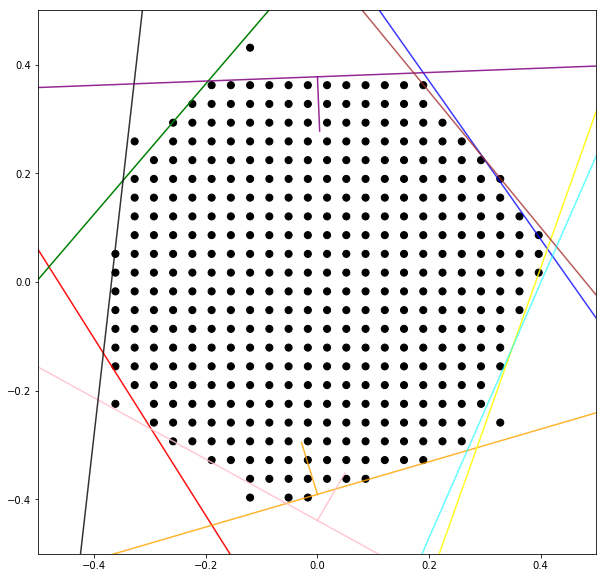

probability of choosing r is 0.113
probability of choosing g is 0.121
probability of choosing b is 0.094
probability of choosing orange is 0.099
probability of choosing pink is 0.103
probability of choosing k is 0.097
probability of choosing purple is 0.102
probability of choosing yellow is 0.105
probability of choosing brown is 0.093
probability of choosing cyan is 0.073
p(y=-1|z="r") is 0.585106372833252
p(y=-1|z="g") is 0.6818181872367859
p(y=-1|z="b") is 0.5232558250427246
p(y=-1|z="orange") is 0.6274510025978088
p(y=-1|z="pink") is 0.5546218752861023
p(y=-1|z="k") is 0.49038460850715637
p(y=-1|z="purple") is 0.4356435537338257
p(y=-1|z="yellow") is 0.6458333134651184
p(y=-1|z="brown") is 0.5043478012084961
p(y=-1|z="cyan") is 0.09589041024446487


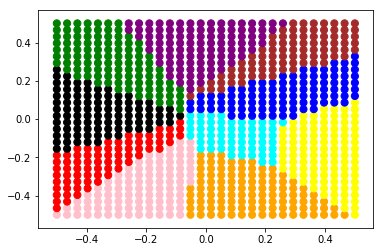

In [11]:
t.plot(to_var(x.data), to_var(y.data), inrange=True)

# View cluster as a multi-task learning problem

If we view each cluster as a different task, this becomes a multi-task learning problem in which we find the subtask we want to separate. If tasks $T=\{t_i\}_{i=1}^{|T|}$ are given, the switch network can just take task number $t$ as input.

My method is different from previous works in that:
1. cluster assignment and classifiers are jointly learned
2. task similarities are not forced but to optimize a very natural objective (related tasks share the same cluster and thus the same classifier)
3. multiple level of regularization are enforced (low cluster number, shared weight generation network)

Given previous works, we already have 2 generalization bound (Learning Multiple Tasks using Shared Hypotheses (Crammer and Mansour, 2012), Clustered Support Vector Machines (Gu and Han, 2013)). I should be able to improve on their bound because my model is jointly learned.

A more modern comparison is to Adaptive Smoothed Online Multi-Task Learning (Murugesan et. al, 2016). They learn a task similarity matrix through weighting loss function of each task by their similarity to other tasks and adding a prior of high entropy to bias sharing. My work differs by a) using a more natural objective function and b) sharing is not forced but learned (assuming the weight network has enough capacity and |z| is as large as number of tasks |T|).

Here, we show result on synthetic data for (Crammer, 2012) and real data in (Murugesan et. al, 2016).

I shoud do an ablation study to study the effect of joint training

1. switch network is 
   1. kmeans clustering
   2. spectral clustering
   3. autoencoder + spectral clustering
   4. stochastically trained
   5. random assignment (iterate in weight network)
2. weight network is 
   1. k independent classifiers
   2. shared classifier through regularizing a master network
   
connection to existing works:

1(a) + 2(a) = cluster SVM

1(e) + 2(a) = shared k hypothesis

thus we have 10 baselines to juggle with

In this work, we want to answer the following question

1. does joint clustering better than other hard clustering techniques?
2. how to most efficiently add in task number as a helper information?

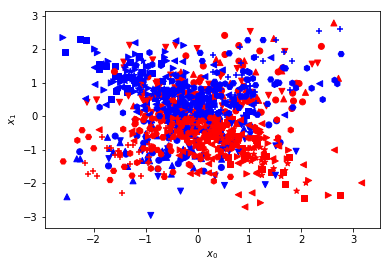

In [29]:
def genTask(n=100):
    d = 20
    C = np.eye(d)
    cov = np.random.rand() * 2 - 1
    st = 1 if (np.random.rand()-0.5 > 0) else -1
    C[0,1] = C[1,0] = cov
    while True:
        X = genCovX(C, n)
        y = ((X[:,1] * st) >= 0).astype(np.int)
        if sum(y) > 0 and sum(y) < n: # has both positive and negative examples
            break
    return X, y*2-1

markers = [',','o','^','v','<','>','*','h','H','+']

for m in markers:
    X, y = genTask()
    colors = list(map(lambda a: 'b' if a==-1 else 'r', y))
    plt.scatter(X[:,0], X[:,1], c=colors, marker=m)
    
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.show()

In [30]:
ntasks = 100
train_n = 6
test_n = 1000
train_tasks = [(genTask(n=train_n), i) for i in range(ntasks)]
test_tasks = [(genTask(n=test_n), i) for i in range(ntasks)]

X = np.vstack(list(map(lambda x: np.hstack([x[0][0], 
                                            x[1]*np.ones_like(x[0][0][:,:1])]), train_tasks)))
Y = np.hstack(list(map(lambda x: x[0][1], train_tasks)))

Xtest = np.vstack(list(map(lambda x: np.hstack([x[0][0], 
                                            x[1]*np.ones_like(x[0][0][:,:1])]), test_tasks)))
Ytest = np.hstack(list(map(lambda x: x[0][1], test_tasks)))

In [31]:
print(X.shape, Y.shape)

(600, 21) (600,)


In [ ]:
def apply_linear_mtl(f, x):
    return apply_linear(f, x[:,:-1])

mtl = False

if mtl:
    input_size = 20
    task_size = ntasks # one hot representation
    switch_size = 10
    apply_f = apply_linear_mtl
else:
    input_size = 21
    task_size = input_size
    switch_size = 10
    apply_f = apply_linear


switch = Switch(task_size, switch_size, mtl=mtl)
weight = Weight(switch_size, input_size+1) # +1 for b in linear model

alpha = -0.05
beta = -alpha
name = 'mtl_small'+str(alpha)+'_ntask' + str(ntasks) + '_nswitch' + str(switch_size) + '_mtl' + str(mtl)
t =  InterpretableTrainer(switch, weight, apply_f, alpha=alpha, beta=beta,
                         log_name=name, silence=True)

# fit a model here:
x = to_var(torch.from_numpy(X)).float()
y = to_var(torch.from_numpy(Y)).float()

train_data = TensorDataset(x.data, y.data)
data = DataLoader(train_data, batch_size=1000, shuffle=True)

xtest = to_var(torch.from_numpy(Xtest)).float()
ytest = to_var(torch.from_numpy(Ytest)).float()

test_data = TensorDataset(xtest.data, ytest.data)
test_data = DataLoader(test_data, batch_size=200, shuffle=True)

t.fit(data, n_epochs=1500, print_every=100, valdata=test_data)

0.07% (0m 0s) 5.5307
6.73% (0m 16s) 0.6774
13.40% (0m 31s) 0.6126
20.07% (0m 46s) 0.5001
26.73% (1m 1s) 0.4098
33.40% (1m 17s) 0.3524
40.07% (1m 33s) 0.3143
46.73% (1m 49s) 0.3000
53.40% (2m 4s) 0.2751
60.07% (2m 20s) 0.2718
66.73% (2m 39s) 0.2511
73.40% (3m 1s) 0.2484
80.07% (3m 23s) 0.2448


In [10]:
def reportAcc():
    accuracy = 0
    for k, (x, y) in enumerate(test_data):
        x, y = to_var(x).float(), to_var(y).float()
        yhat = to_np(t.forward(x) >= 0)
        yhat = yhat.astype(int)*2-1
        y = to_np(y)
        acc = (yhat==y).sum() / y.shape[0]
        accuracy += 1 / (k+1) * (acc - accuracy)
    print(accuracy)

reportAcc()

0.5926
